In [128]:
import plaidml
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import random 

# Exercice 1 


## Question 1 

Le critère d'arrêt est le suivant : $\frac{|F(x_{k+1})-F(x_{k})|}{F(x_{k+1})}\leq \epsilon$

Ici le prof incite à plutôt proposer un nombre d'itération, c'est plus simple d'observer la convergence


## Question 2

In [11]:
def gradient_descent(F,DF,xk,alpha=0.01,epsilon=0.001):
    xk1 =  xk - alpha*DF(xk)
    while(DF(xk) > epsilon):
        temp = xk1
        xk1  = xk - alpha*DF(xk)
        xk   = temp
    return xk1

## Question 3

Si la fonction n'est pas convexe, on peut tomber sur un minimum local qui n'est pas un forcément globale 

## Question 4


Dans le cas convexe, il influence sur la vitesse à laquelle on converge. Cependant dans le cas non convexe, il peut emmener sur un minimum complétement différent

# Exercice 2

## Question 1

Ici on a $\sum_{i} w_{i}x_{i} - \theta > 0$ qui donne l'équation de l'hyperplan, dans le plan de dimension $n+1$

## Question 2

On peut traiter $\theta$ comme le poids associé à $x_{0}=1$.

On peut donc adapter le problème de l'estimation des paramètres en l'estimation d'un unique vecteur 
\begin{align}
w &= (w_0,w_1,\dots,w_{n+1})\\
w &= (\theta,w_1,\dots,w_{n+1})
\end{align}

On cherche donc un hyperplan en dimension $d+1$ plutôt qu'en dimension $d$.

On peut aussi se dire que avec $=0$ on passe par l'origine, $=\theta$ on ne passe plus forcément par l'origine.

On a un degré de liberté en plus, on a maintenant un modèle affine. 


## Question 3

Des points disposés de manière circulaire ne peuvent être séparés de manière linéaire. On a l'exemple suivant :

In [129]:
from sklearn import cluster, datasets, mixture
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
n_samples = 1500
X,y = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

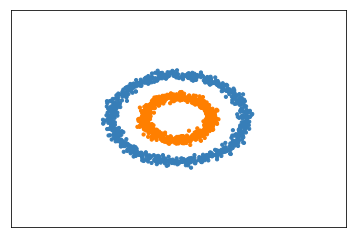

In [2]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']),int(max(y) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10,color=colors[y])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()
        

Ici il vaut mieux passer par les coordonnées polaires

## Question 4

Il suffit d'ajouter 2 points pour rendre deux classes non linairement séparables

# Exercice 3


## Question 1 : 

Si l'échantillon n'est pas linéairement séparable, on risque de ne pas avoir de convergence. Tous les exemples ne pourront pas être bien séparés. De plus on bouge tout l'hyperplan pour bien classer l'exemple que l'on veut, ce qui peut tout casser pour les autres points. On bouge trop l'hyperplan pour chaque points mal classés.

## Question 2 : 

La descente stochastique de gradient s'effectue de la même façon. On soustrait pour chaque erreur en utilisant le \textbf{gradient}. Ici on voit bien que le gradient de l'erreur $\nabla e=(T_{x}-O(x))F(x)'$

La somme globale n'intervient pas, le coté stochastique apparait par la prise une par une de chaque exemples. 
On bouge maintenant petit à petit en utilisant le paramètre $\epsilon$.

# Exercice 4
## Question 1:

In [160]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def weight_update(w,b,x,y):
    # Fonction to update the wheights given an exemple and a label 
    print("len w : {}".format(len(w)))
    for i in range(len(w)):
        w[i] += eps*(y-np.sum(x*w)+b)*x[i]
    
def E(X,y,w,b):
    e = 0
    for i in range(len(X)):
        e+= (1/2)*(y[i] - np.sum(X[i]*w)+b)**2
    return e/len(y)

def train(X,y):
    N = 2000
    n = np.shape(X)[1]
    print("weight size : {}".format(n))
    w = -0.001+np.zeros(n)
    biais = 1
    B = np.zeros(N)
    Er = np.zeros(N+1)
    W = np.zeros((N,n))
    Er[0] = E(X,y,w,biais)
    k = 0     
    while(k<N):  
        print("epoch n°{}".format(k))
        for i in range(len(y)):
            new_bias = eps * (y[i]-np.sum(X[i]*w)+biais)
            weight_update(w,biais,X[i],y[i])
            biais = new_bias
        B[k] = biais
        W[k] = w
        k+=1
        Er[k] = E(X,y,w,biais)
        #print("loss = {}".format(Er[k]))
    plt.figure(1)
    plt.plot(Er)
    plt.show()
    return w,biais,B,W
    
def predict(x,w,b):
    return np.sum(x*w)+biais





In [ ]:
# Main code 
eps = 0.001
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([-1,1,1,1])
print(X)
print(y)
weight,biais,B,W = train(X,y)

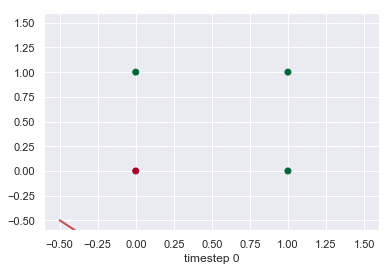

In [131]:
import seaborn as sns
from matplotlib import cm
def update(i):
    label = 'timestep {0}'.format(i)
    line.set_ydata( -W[i,0]/(W[i,1])*datax + (-B[i] / W[i,1]))
    ax.set_xlabel(label)
    return line, ax

classes = ["0","1"]
sns.set(style="darkgrid")
fig, ax = plt.subplots()
datax = np.linspace(-0.5,1.5)
scatter = ax.scatter([0,0,1,1],[0,1,0,1],c=[-1.,2.,2.,2.],cmap="RdYlGn")


line, = ax.plot(datax, datax, 'r-', linewidth=2)

anim = FuncAnimation(fig, update, frames=np.arange(0, len(W),20), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')
plt.show()

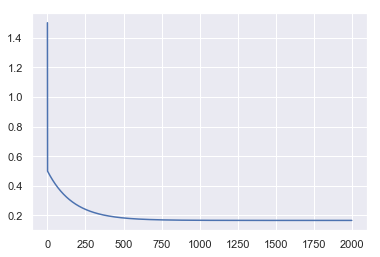

In [113]:
data0 = np.random.randn(1000, 2) + [3,0]
data1 = np.random.randn(1000, 2) - 3
labels0 = 2*np.ones(1000)
labels1 = -np.ones(1000)
data = np.concatenate([data0, data1])
labels = np.concatenate([labels0, labels1])
weight,biais,B,W = train(X,y)


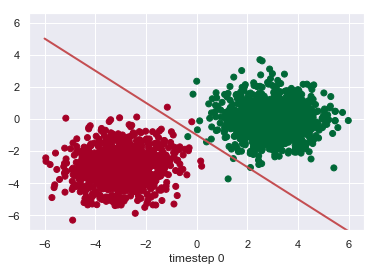

In [114]:
classes = ["0","1"]
sns.set(style="darkgrid")
fig, ax = plt.subplots()
datax = np.linspace(-6,6)

scatter = ax.scatter(np.concatenate([data0[:,0],data1[:,0]]),np.concatenate([data0[:,1],data1[:,1]]),c=np.concatenate([labels0,labels1]),cmap="RdYlGn")


line, = ax.plot(datax, datax, 'r-', linewidth=2)

anim = FuncAnimation(fig, update, frames=np.arange(0, len(W),20), interval=200)
anim.save('line2.gif', dpi=80, writer='imagemagick')
plt.show()

In [152]:
dtrain = np.loadtxt("zip.train")
dtest  = np.loadtxt("zip.test")

In [161]:
X = dtrain[:,1:]
y = dtrain[:,0]
print(len(X))
print(len(y))

7291
7291


In [162]:
weight,biais,B,W = train(X,y)

weight size : 256
epoch n°0
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updatind w[i]
updati

KeyboardInterrupt: 

In [ ]:
X = dtest[:,1:]
y = dtest[:,0]
print(weight)
for i in X:
    print(predict(i,weight,biais))
dy = [predict(i,weight,biais) for i in X]